# Final Back Test
Full back test doing 5-fold cross validation for 10 different random seed, used as a final performance evaluation after model selection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from hyperopt import hp, fmin, tpe, Trials, space_eval, STATUS_OK
from data_process.data_transform_processor import DataTransformProcessor
from models.model_flow import ModelFlow
# from schema.columns_added_filled import LABEL_COL, NUMERICAL_COLS, CATEGORICAL_COLS, LOG_COLS
from schema.columns_added import LABEL_COL, NUMERICAL_COLS, CATEGORICAL_COLS, LOG_COLS
# from schema.columns_original import LABEL_COL, NUMERICAL_COLS, CATEGORICAL_COLS, LOG_COLS
from models.nn_models.dnn import DNN
from lightgbm import LGBMRegressor
import lightgbm
from sklearn.linear_model import ElasticNet
from models.tree_models.lgbm import LGBM
from models.backtest import BackTest
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


# Prepare data

In [2]:
df_all = pd.read_csv('/Users/shuyangdu/Desktop/ZillowChallenge/data/df_merged_20171007.csv', low_memory=False)

# Candidate Data Processors

In [3]:
data_processor_dummy = DataTransformProcessor(
    use_dummy=True, use_scale=True,
    numerical_cols=NUMERICAL_COLS, 
    categorical_cols=CATEGORICAL_COLS,
    log_cols=LOG_COLS, 
    label_col=LABEL_COL,
)
data_processor_tree = DataTransformProcessor(
    numerical_cols=NUMERICAL_COLS, 
    categorical_cols=CATEGORICAL_COLS,
    log_cols=LOG_COLS, 
    label_col=LABEL_COL,
)

## Data preprocess

In [4]:
X_all = data_processor_tree.pre_process(df_all)
y_all = df_all[LABEL_COL].values

# Candidate Models

## ElasticNet

In [5]:
model_elt = ElasticNet(alpha=90, l1_ratio=0.85)

## LightGBM

In [6]:
params_gbd_l1 = {
    'max_bin': 80,
    'learning_rate': 0.0116,
    'boosting_type': 'gbdt',
    'objective': 'regression_l1',
    'feature_fraction': 0.94,
    'bagging_fraction': 0.85,
    'bagging_freq': 80,
    'num_leaves': 110,
    'lambda_l2': 86.9,
    'n_estimators': 450,
}

In [7]:
params_gbd_l2 = {
    'max_bin': 80,
    'learning_rate': 0.0116,
    'boosting_type': 'gbdt',
    'objective': 'regression_l2',
    'feature_fraction': 0.94,
    'bagging_fraction': 0.85,
    'bagging_freq': 80,
    'num_leaves': 110,
    'lambda_l2': 86.9,
    'n_estimators': 450,
}

In [8]:
params_rf_l1 = {
    'max_bin': 80,
    'learning_rate': 0.0116,
    'boosting_type': 'rf',
    'objective': 'regression_l1',
    'feature_fraction': 0.94,
    'bagging_fraction': 0.85,
    'bagging_freq': 80,
    'num_leaves': 110,
    'lambda_l2': 86.9,
    'n_estimators': 450,
}

In [19]:
model_lgbm = LGBM(
#     categorical_feature=data_processor_tree.categorical_col_idx,
    **params_gbd_l1
)

## NeuralNetwork

In [8]:
model_dnn = DNN(
    dim_hidden_lst=[30], 
    learning_rate=0.01, 
    decay=0.0001,
    batch_size=128, 
    epochs=5, 
    verbose=0
)

# Back test

In [14]:
model_flow = ModelFlow(model=model_lgbm, data_processor=data_processor_tree)

In [15]:
backtest = BackTest(model_flow=model_flow)

## LightGBM

In [36]:
backtest.full_cv(X_all, y_all)

0.067055145204735878

In [13]:
# gbd_l2
backtest.single_cv(X_all, y_all)

0.06873267229354682

In [20]:
# gbd_l1
backtest.single_cv(X_all, y_all)

0.06729353407235214

In [12]:
# gbd_l1 2016 and 2017
backtest.single_cv(X_all, y_all)

0.067882692753972504

In [16]:
# gbd_l1 2016 and 2017 2.0.7
backtest.single_cv(X_all, y_all)

0.071656220390962505

In [20]:
# gbd_l1 2016 and 2017 2.0.7, no categorical
backtest.single_cv(X_all, y_all)

0.071651371323776442

In [12]:
# rf_l1 2016 and 2017
backtest.single_cv(X_all, y_all)

/Users/shuyangdu/anaconda/envs/py27/lib/python2.7/site-packages/lightgbm/basic.py:1004: UserWarning: categorical_feature in Dataset is overrided. New categorical_feature is [58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]
  warnings.warn('categorical_feature in Dataset is overrided. New categorical_feature is {}'.format(sorted(list(categorical_feature))))


0.070313632832138734

In [17]:
backtest.full_cv(X_all, y_all)

0.067105600663580456

In [9]:
# check with old values
backtest.full_cv(X_all, y_all)

0.067103132549343927

In [75]:
backtest.single_cv(X_all, y_all)

0.067011907335776305

In [9]:
backtest.single_cv(X_all, y_all)

0.067177496201157746

## ElasticNet

In [10]:
backtest.full_cv(X_all, y_all)

0.068458717051321921

In [24]:
backtest.single_cv(X_all, y_all)

0.068457909738367503

## NeuralNetwork

In [9]:
backtest.full_cv(X_all, y_all)

0.06844671392965937

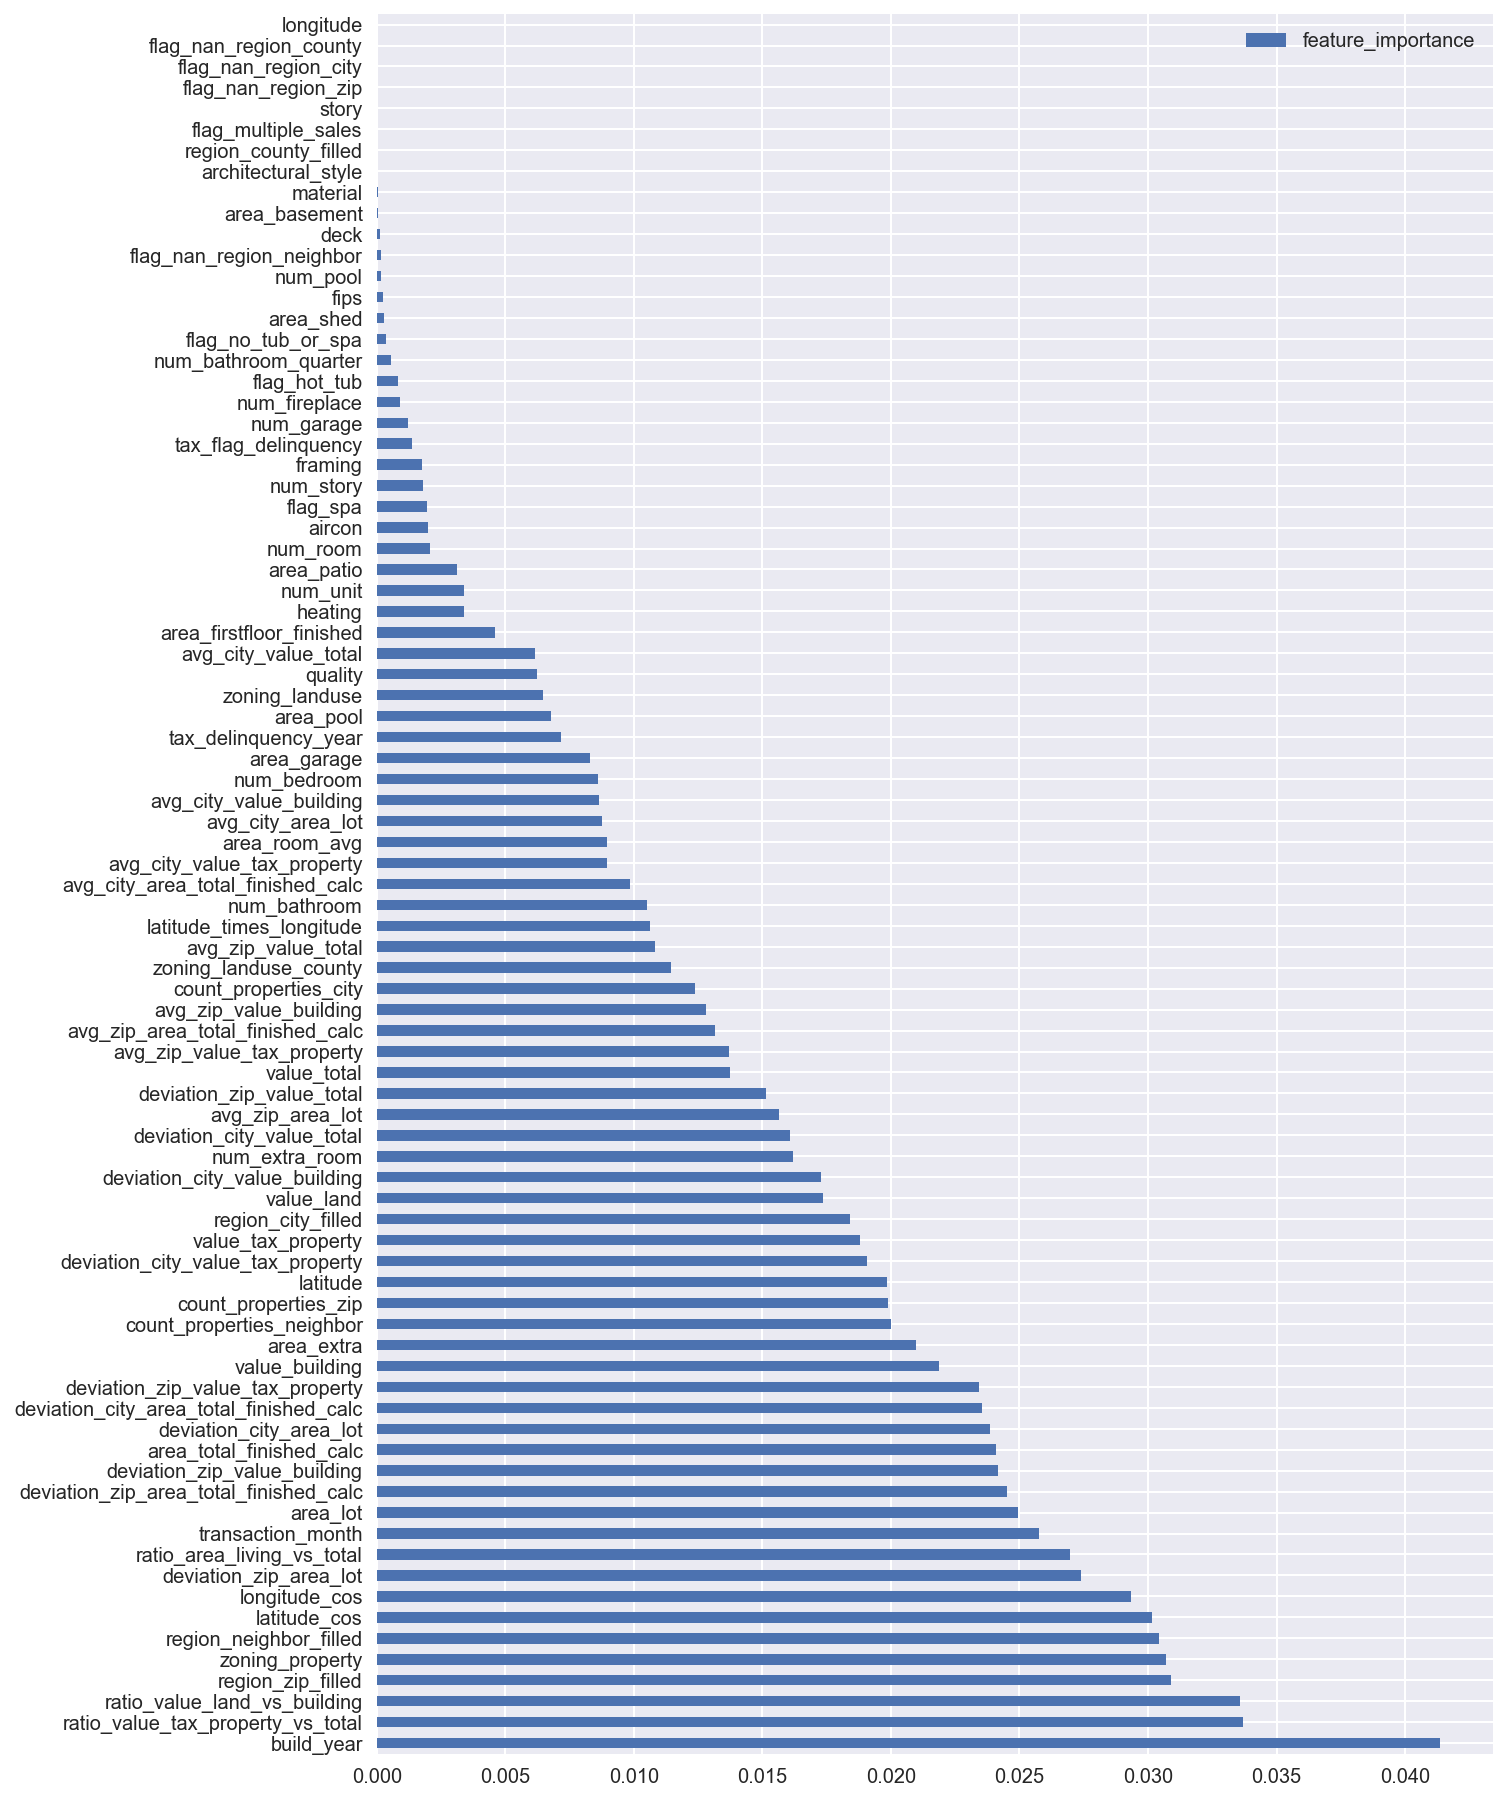

In [36]:
model_flow.feature_importance_plot

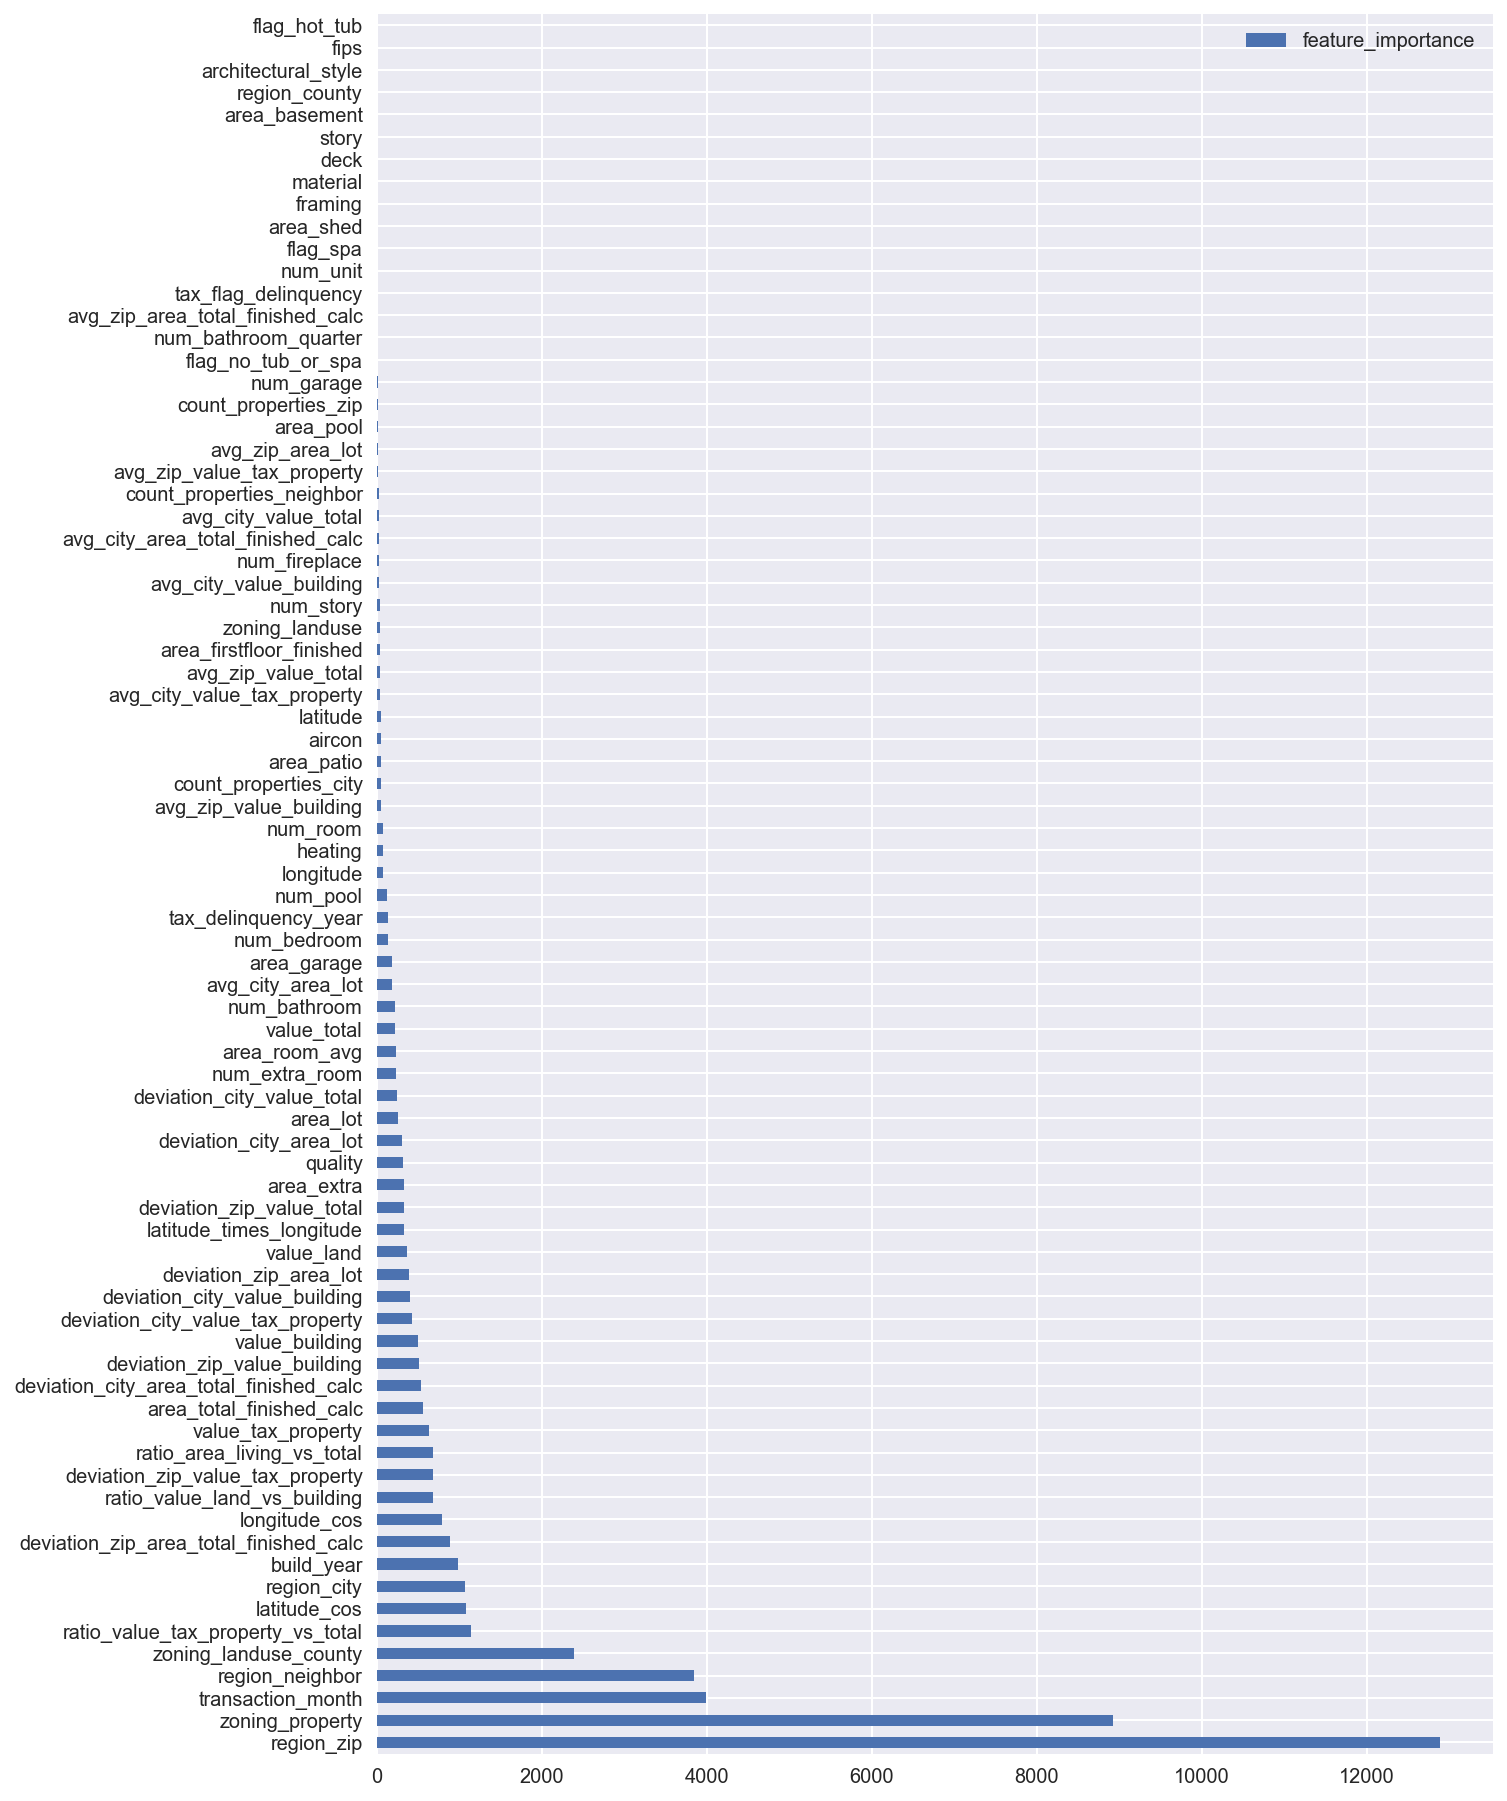

In [18]:
model_flow.feature_importance_plot